# Aula 10: Introdução a Machine Learning

### O que é Machine Learning? Como funciona?

Entender melhor como funciona a construção de um modelo preditivo

Imaginem que queiramos prever o tipo de uma flor e que tenhamos os seguintes dados:

   Variáveis:
       - sepal length in cm
       - sepal width in cm
       - petal length in cm
       - petal width in cm
   
   Classes:
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica



<img src="Petal-sepal.jpg" width="400" height="100">

In [1]:
import os
import pandas as pd

from sklearn import model_selection
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.metrics import confusion_matrix

In [2]:
data_file = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(data_file, names=names)

In [3]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.sample(n=20)

,sepal-length,sepal-width,petal-length,petal-width,class
87,6.3,2.3,4.4,1.3,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa
141,6.9,3.1,5.1,2.3,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
132,6.4,2.8,5.6,2.2,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor


In [5]:
dataset[dataset["class"] == "Iris-versicolor"].describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [6]:
dataset[dataset["class"] == "Iris-virginica"].describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [7]:
dataset[dataset["class"] == "Iris-setosa"].describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [ ]:
[4.7, 3.8, 5, 3.2] # -> "Virginica" 0.33%

Tamanho da base de dados:

In [8]:
dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].iloc[77]

sepal-length    6.7
sepal-width     3.0
petal-length    5.0
petal-width     1.7
Name: 77, dtype: float64

In [9]:
print("Tamanho:", len(dataset))

Tamanho: 150


### Descrição dos dados

In [10]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Observações por tipo de flores:

In [11]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
dummie_class = pd.get_dummies(dataset['class'],dtype=int,prefix='class')

In [19]:
dummie_class

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [20]:
Y = dummie_class["class_Iris-virginica"]

In [21]:
Y.sample(n=10)

49     0
5      0
1      0
117    1
104    1
56     0
67     0
29     0
130    1
99     0
Name: class_Iris-virginica, dtype: int64

In [22]:
X = dataset[["sepal-length","sepal-width","petal-length","petal-width"]]
X = sm.add_constant(X)

In [24]:
X

,const,sepal-length,sepal-width,petal-length,petal-width
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1.0,6.7,3.0,5.2,2.3
146,1.0,6.3,2.5,5.0,1.9
147,1.0,6.5,3.0,5.2,2.0
148,1.0,6.2,3.4,5.4,2.3


In [25]:
probit_mod = sm.Probit(Y, X)

In [26]:
probit_res = probit_mod.fit(maxiter=500)

Optimization terminated successfully.
         Current function value: 0.039176
         Iterations 13


In [27]:
print(probit_res.summary2())

                           Results: Probit
Model:              Probit               Method:           MLE       
Dependent Variable: class_Iris-virginica Pseudo R-squared: 0.938     
Date:               2023-11-06 12:48     AIC:              21.7527   
No. Observations:   150                  BIC:              36.8059   
Df Model:           4                    Log-Likelihood:   -5.8763   
Df Residuals:       145                  LL-Null:          -95.477   
Converged:          1.0000               LLR p-value:      1.1066e-37
No. Iterations:     13.0000              Scale:            1.0000    
----------------------------------------------------------------------
                 Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
----------------------------------------------------------------------
const           -23.9848   14.4426  -1.6607  0.0968  -52.2918   4.3222
sepal-length     -1.4405    1.3360  -1.0782  0.2809   -4.0590   1.1780
sepal-width      -3.7781    2.5782  -1.465

In [28]:
print(probit_res.get_margeff(at='overall', method='dydx').summary())

        Probit Marginal Effects        
Dep. Variable:     class_Iris-virginica
Method:                            dydx
At:                             overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal-length    -0.0309      0.026     -1.206      0.228      -0.081       0.019
sepal-width     -0.0810      0.045     -1.790      0.073      -0.170       0.008
petal-length     0.1139      0.032      3.562      0.000       0.051       0.177
petal-width      0.2247      0.077      2.933      0.003       0.075       0.375


In [29]:
X

,const,sepal-length,sepal-width,petal-length,petal-width
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1.0,6.7,3.0,5.2,2.3
146,1.0,6.3,2.5,5.0,1.9
147,1.0,6.5,3.0,5.2,2.0
148,1.0,6.2,3.4,5.4,2.3


In [37]:
predictions = probit_res.predict(X)

In [40]:
predictions = predictions.apply(lambda x: round(x))

In [41]:
predictions[0:15]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [33]:
Y[0:15]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: class_Iris-virginica, dtype: int64

In [ ]:
[4.7, 3.8, 5, 3.2]

In [42]:
probit_res.predict([[1, 4.7, 3.8, 5, 3.2]])

array([1.])

In [43]:
predictions = probit_res.predict([[1,7.6,5.4,3.2,2.8]])
print(predictions)

[1.59496587e-19]


Observar comportamento dos dados:

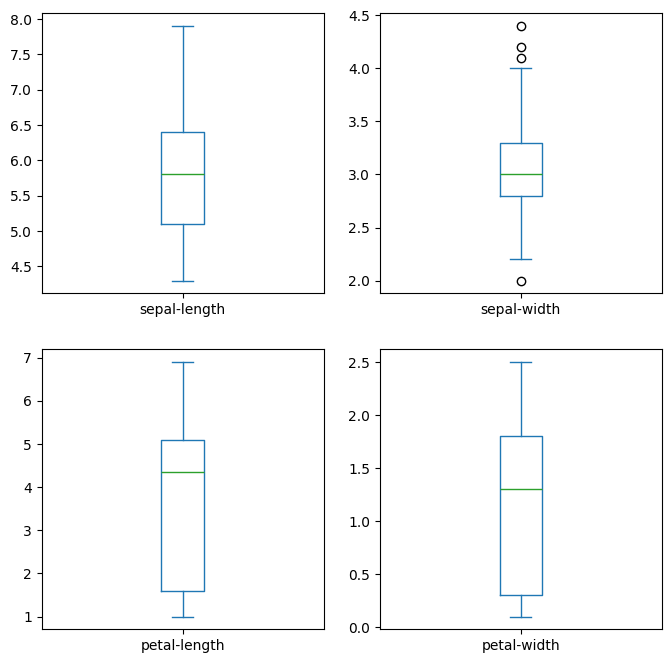

In [44]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8, 8))
plt.show()

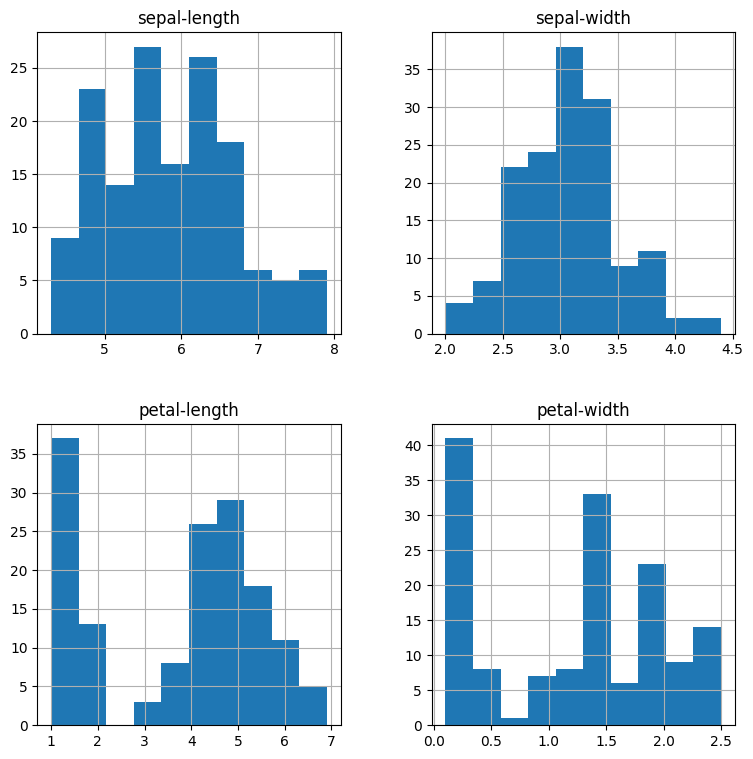

In [45]:
dataset.hist(figsize=(9, 9))
plt.show()

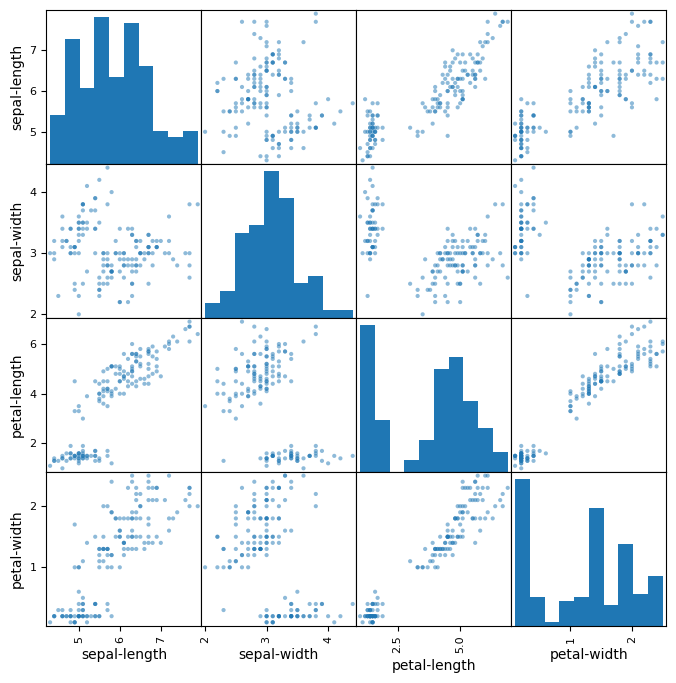

In [46]:
scatter_matrix(dataset, figsize=(8, 8))
plt.show()

### Preparar dados para estimar o modelo

In [47]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
dataset.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [49]:
array = dataset.values

In [50]:
array

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [51]:
array[:,0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
X = array[:,0:4]

In [53]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
Y = array[:,4]

In [55]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [56]:
y_treinamento = Y[0:120]

In [57]:
len(y_treinamento)

120

In [58]:
150*0.8

120.0

In [59]:
array

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [60]:
from sklearn.utils import shuffle

In [61]:
dados_ale = shuffle(array)

In [62]:
dados_ale[0:121]

array([[5.7, 2.9, 4.2, 1.3, 'Iris-versicolor'],
       [5.7, 2.6, 3.5, 1.0, 'Iris-versicolor'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.7, 2.8, 4.5, 1.3, 'Iris-versicolor'],
       [5.8, 2.6, 4.0, 1.2, 'Iris-versicolor'],
       [6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'],
       [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'],
       [6.2, 2.9, 4.3, 1.3, 'Iris-versicolor'],
       [4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'],
       [5.0, 2.3, 3.3, 1.0, 'Iris-versicolor'],
       [6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'],
       [6.7, 3.1, 4.4, 1.4, 'Iris-versicolor'],
       [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
       [6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
       [6.5, 3.0, 5.8, 2.2, 'Iris-virginica'],
       [6.5, 3.0, 5.2, 2.0, 'Iris-virginica'],
       [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'],
       [5.9, 3.0, 4.2, 1.5, 'Iris-versicolor'],
       [5.8, 2.7, 4.1, 1.0, 'Iris-versicolor'],
       [5.7, 2.5, 5.0, 2.0, 'Iris-virginica'],
       [5.7, 3.0, 4.2, 1.2, 'Iris-versicolor'],
       [6.0,

In [63]:
dados_ale[:,0:4]

array([[5.7, 2.9, 4.2, 1.3],
       [5.7, 2.6, 3.5, 1.0],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2.6, 4.0, 1.2],
       [6.1, 2.8, 4.7, 1.2],
       [5.0, 3.5, 1.3, 0.3],
       [6.2, 2.9, 4.3, 1.3],
       [4.9, 2.4, 3.3, 1.0],
       [5.0, 2.3, 3.3, 1.0],
       [6.4, 3.2, 4.5, 1.5],
       [6.7, 3.1, 4.4, 1.4],
       [5.1, 3.3, 1.7, 0.5],
       [6.3, 2.5, 5.0, 1.9],
       [6.5, 3.0, 5.8, 2.2],
       [6.5, 3.0, 5.2, 2.0],
       [5.5, 4.2, 1.4, 0.2],
       [5.9, 3.0, 4.2, 1.5],
       [5.8, 2.7, 4.1, 1.0],
       [5.7, 2.5, 5.0, 2.0],
       [5.7, 3.0, 4.2, 1.2],
       [6.0, 3.0, 4.8, 1.8],
       [5.7, 3.8, 1.7, 0.3],
       [7.2, 3.0, 5.8, 1.6],
       [5.0, 3.2, 1.2, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [7.0, 3.2, 4.7, 1.4],
       [4.4, 3.0, 1.3, 0.2],
       [7.6, 3.0, 6.6, 2.1],
       [6.6, 3.0, 4.4, 1.4],
       [4.8, 3.1, 1.6, 0.2],
       [5.0, 3.3, 1.4, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 2

In [64]:
dados_ale[:,4]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versico

In [66]:
validation_size = 0.20
seed = 7

In [67]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [68]:
len(Y_train)

120

In [69]:
Y_validation

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [70]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

In [71]:
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [72]:
print("Treinamento")
print("    Tamanho X_train:", len(X_train))
print("    Tamanho Y_train:", len(Y_train))
print("Validação")
print("    Tamanho X_validation:", len(X_validation))
print("    Tamanho Y_validation:", len(Y_validation))

Treinamento
    Tamanho X_train: 120
    Tamanho Y_train: 120
Validação
    Tamanho X_validation: 30
    Tamanho Y_validation: 30


### Treinar Modelo

In [73]:
svm = SVC(probability=True)
#svm = SVC()

In [74]:
svm

SVC(probability=True)

In [75]:
svm.fit(X_train, Y_train)

SVC(probability=True)

In [76]:
svm

SVC(probability=True)

### Realizar previsão

In [77]:
X_validation

array([[5.9, 3.0, 5.1, 1.8],
       [5.4, 3.0, 4.5, 1.5],
       [5.0, 3.5, 1.3, 0.3],
       [5.6, 3.0, 4.5, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [4.5, 2.3, 1.3, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [5.6, 2.7, 4.2, 1.3],
       [4.8, 3.4, 1.6, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [6.7, 3.0, 5.0, 1.7],
       [6.0, 3.4, 4.5, 1.6],
       [5.2, 4.1, 1.5, 0.1],
       [7.2, 3.6, 6.1, 2.5],
       [5.2, 3.4, 1.4, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.8, 2.7, 3.9, 1.2],
       [6.9, 3.2, 5.7, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [6.0, 2.2, 5.0, 1.5],
       [7.2, 3.0, 5.8, 1.6],
       [6.0, 3.0, 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.1, 5.6, 2.4]], dtype=object)

In [79]:
predictions = svm.predict(X_validation)

In [80]:
print(predictions)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


Vamos ver o que era cada uma delas na verdade:

In [81]:
print(Y_validation)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


Podemos observar a taxa de acerto comparando os dois resultados:

In [82]:
print(accuracy_score(Y_validation, predictions))

0.8666666666666667


In [83]:
svm.predict([[4.7, 3.8, 5, 3.2]])

array(['Iris-virginica'], dtype=object)

In [84]:
svm.predict([[47, 3.8, 5, 3.2]])

array(['Iris-setosa'], dtype=object)

In [85]:
svm.predict_proba([[4.7, 3.8, 5, 3.2]])

array([[0.0330218 , 0.00787955, 0.95909866]])

In [86]:
svm.predict(X_validation)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [87]:
svm.predict_proba(X_validation)

array([[0.01346297, 0.15264493, 0.83389211],
       [0.01037634, 0.88562868, 0.10399498],
       [0.97559278, 0.01532129, 0.00908593],
       [0.00956972, 0.8945562 , 0.09587408],
       [0.01468843, 0.74926801, 0.23604355],
       [0.92077705, 0.06346749, 0.01575546],
       [0.01244867, 0.66746063, 0.32009071],
       [0.00857668, 0.9775418 , 0.01388151],
       [0.96353132, 0.02576279, 0.01070589],
       [0.01114433, 0.9122101 , 0.07664557],
       [0.01227603, 0.34690741, 0.64081656],
       [0.01347648, 0.8609035 , 0.12562002],
       [0.97886555, 0.01164681, 0.00948764],
       [0.01157382, 0.00136429, 0.98706189],
       [0.97052553, 0.01949469, 0.00997977],
       [0.01542653, 0.41899341, 0.56558006],
       [0.00863077, 0.01114814, 0.98022109],
       [0.01035813, 0.03190448, 0.95773739],
       [0.97148365, 0.01823136, 0.01028499],
       [0.96069873, 0.02835508, 0.01094619],
       [0.01351872, 0.98177931, 0.00470197],
       [0.00918601, 0.00305974, 0.98775425],
       [0.

In [88]:
Y_validation

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [89]:
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [90]:
confusion_matrix(Y_validation, predictions)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]])

In [91]:
svm.predict([[1.37, 3, 1.22, 3.14]])

array(['Iris-setosa'], dtype=object)

In [92]:
svm.predict_proba([[1.37, 3, 1.22, 3.14]])

array([[0.50395923, 0.31353522, 0.18250555]])

In [93]:
svm = SVC(probability=True, gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9333333333333333


In [94]:
svm.predict([[1.37, 3, 1.22, 3.14]])

array(['Iris-virginica'], dtype=object)

In [95]:
svm.predict_proba([[1.37, 3, 1.22, 3.14]])

array([[0.24536399, 0.31469334, 0.43994267]])

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9


In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8666666666666667


E calcular a matrix de cofusão:

In [99]:
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

In [100]:
cm = confusion_matrix(Y_validation, predictions)
print(cm)

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


Também observando graficamente:

/var/folders/_8/gg5mzydn7kd1x2pxmbp9wk240000gn/T/ipykernel_3330/3105882133.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] +labels)
/var/folders/_8/gg5mzydn7kd1x2pxmbp9wk240000gn/T/ipykernel_3330/3105882133.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


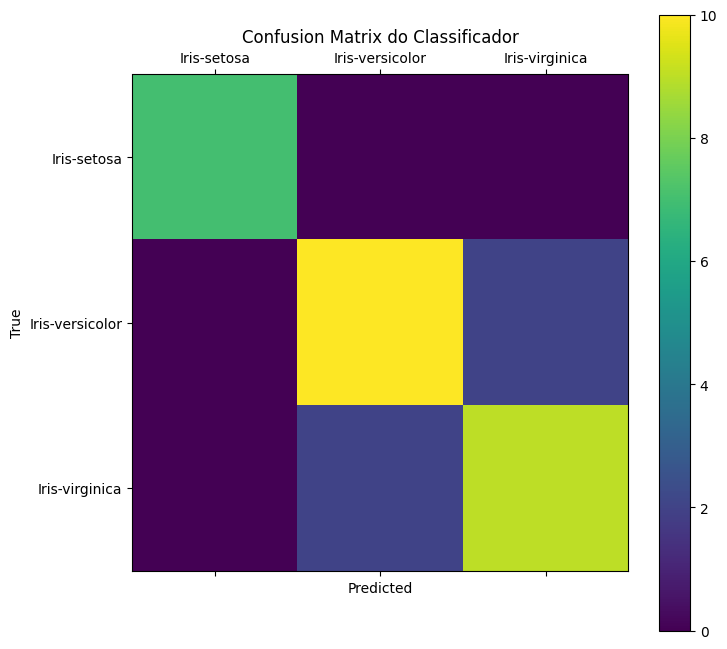

In [101]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("Confusion Matrix do Classificador")
fig.colorbar(cax)
ax.set_xticklabels([''] +labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Finalmente, podemos observar as probabilidades associadas a cada uma das observações:

In [102]:
probs = svm.predict_proba(X_validation)
print(probs)

[[0.01322022 0.07634672 0.91043306]
 [0.01424351 0.80262796 0.18312852]
 [0.96963534 0.01468542 0.01567924]
 [0.01212686 0.85729993 0.13057321]
 [0.02673761 0.43550216 0.53776023]
 [0.86839417 0.07398629 0.05761953]
 [0.018226   0.83276621 0.14900779]
 [0.00881999 0.97162497 0.01955505]
 [0.96272197 0.01946622 0.01781181]
 [0.01289258 0.95209623 0.03501119]
 [0.01622819 0.45835763 0.52541418]
 [0.01516931 0.87799024 0.10684045]
 [0.96405671 0.01757501 0.01836828]
 [0.01535703 0.00842149 0.97622148]
 [0.9656099  0.01732334 0.01706676]
 [0.01626314 0.32309173 0.66064514]
 [0.0125093  0.01331046 0.97418023]
 [0.01085821 0.02259943 0.96654236]
 [0.96680599 0.01694173 0.01625228]
 [0.95650442 0.02278831 0.02070727]
 [0.00920928 0.98574575 0.00504498]
 [0.01130921 0.00591381 0.98277698]
 [0.01128141 0.89921093 0.08950766]
 [0.01914738 0.419175   0.56167762]
 [0.01429976 0.05959618 0.92610406]
 [0.0146684  0.34156127 0.64377033]
 [0.00982875 0.98221332 0.00795793]
 [0.00981707 0.98149517 0.00

### Realizar novas previsões:

In [103]:
Data = [[2,3,4.5,2.1]]
pred_data = svm.predict(Data)
print(pred_data)

['Iris-virginica']


Ou multiplas:

In [104]:
Data = [[5.9, 3.2, 4.8, 1.8], [4.4, 1.2, 2.1, 0.8]]
pred_data = svm.predict(Data)
print(pred_data)

['Iris-virginica' 'Iris-versicolor']


In [105]:
Data = [[4.6,3.2,5.4,1.6]]
pred_data = svm.predict(Data)
print(pred_data)

['Iris-virginica']


In [106]:
svm.predict_proba(Data)

array([[0.0472327 , 0.06896433, 0.88380297]])

In [107]:
svm

SVC(gamma='auto', probability=True)